# Titanic - Machine Learning from Disaster🛳️

#### The project's target : predicting according to certain features whether a person will survive the Titanic accident
##### For more details [click here!](https://www.kaggle.com/c/titanic/data)

## So how are we going to do that?
* *We will try to understand the data*
* *We will change some of the data as needed*
* *We will run some models of machine learning and see who brings greater success in prediction*
* *Finally we will draw some conclusions for future work with the data* 👌

In [1]:
#First and foremost: make an import to all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read The Data
train_x, train_y = (pd.read_csv('data/train.csv')).iloc[:,2:],pd.read_csv('data/train.csv')['Survived']
test_x, test_y = (pd.read_csv('data/test.csv')).iloc[:,1:],pd.read_csv('data/gender_submission.csv')['Survived']

## Understand the data:

In this section we are going to check the distribution of features, whether there are null values, and everything else that is needed for proper data that will eventually lead to good prediction.

In [3]:
#Looking is always important!
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#We will check how much null each feature has and based on that we will determine how relevant it is.
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


Age:


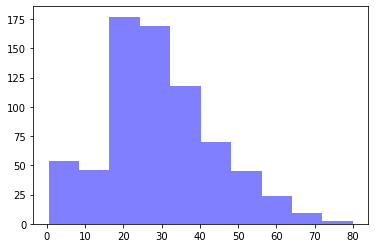

Fare:


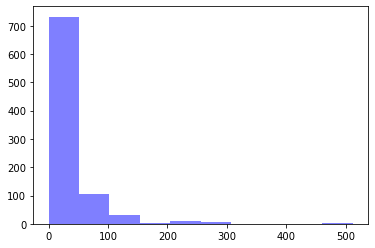

SibSp:


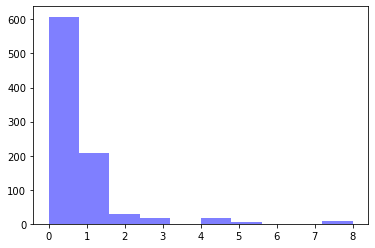

Parch:


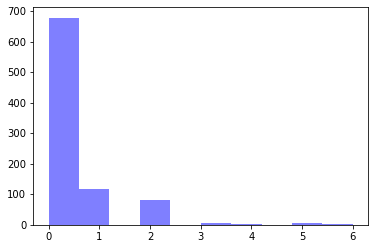

Sex:


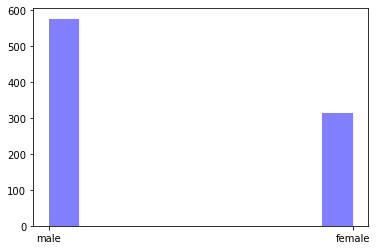

SibSp:


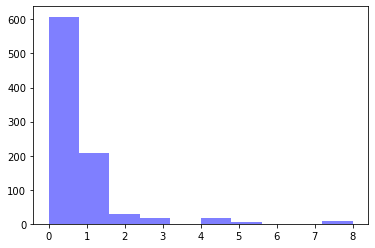

Parch:


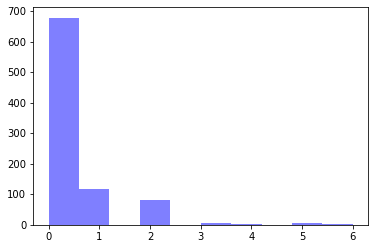

In [6]:
#Let's look at the type of distribution to avoid future prediction faults (Relevant to numeric values & Sex)

for i in ['Age','Fare','SibSp','Parch','Sex','SibSp','Parch']:
    plt.hist(train_x[i], 10, facecolor='blue', alpha=0.5)
    print('{}:'.format(i))
    plt.show()

*Conclusions so far:*
- The cabin feature contains too many null values - it may harm our prediction
- The age distribution is normal - so far so good
- It seems that too many passengers have the same amount of family members on the Titanic - maybe it does not matter in the end?

In [7]:
#Here we can understand the characteristics of the surviving and dead passengers
pd.pivot_table(pd.read_csv('data/train.csv'), index = 'Survived' ,values = ['Age','Fare','Parch','SibSp'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [8]:
'''At first it seemed to me that there was a correlation between the passenger's nickname and the chance that he would survive,
after some model training - I did not see a dramatic change'''

train_x['Name'].str.split(',').str[1].str.split(' ').str[1].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Mme.           1
Don.           1
Lady.          1
Ms.            1
Sir.           1
the            1
Jonkheer.      1
Capt.          1
Name: Name, dtype: int64

In [9]:
#Here one can explicitly see the effect of the features on the chances of survival

print(pd.pivot_table(pd.read_csv('data/train.csv'),index = 'Survived',columns='Sex',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(pd.read_csv('data/train.csv'),index = 'Survived',columns='Embarked',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(pd.read_csv('data/train.csv'),index = 'Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print()

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119



## Play with the data:
It is clear that not all features affect equally and it is clear that not all data is built perfectly, in the next section we are going to deal with these problems.

In [10]:
#First thing: replace a categorical variable with a numeric variable so that our model can handle it
gender = {'male': 0,'female': 1}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
train_x['Sex'] = [gender[item] for item in train_x['Sex']]
test_x['Sex'] = [gender[item] for item in test_x['Sex']]

In [11]:
'''
Now some explanation is needed as to why we are getting rid of the following features:
Ticket - The only thing that a travel card can affect - is the location of the cabin, not all relevant when we have Pclass
Cabin - In an alternative reality - it can have an effect, 
        but there are too many null values so it is difficult to draw conclusions about correlation
Name - Like I said, the nickname did not have much effect and the rest of the name has no reason to have an effect
Embarked - This feature should not have an impact in my humble opinion        
'''

train_x =train_x.drop(columns=['Ticket','Cabin','Name','Embarked'])
test_x = test_x.drop(columns=['Ticket','Cabin','Name','Embarked'])

# Since the distribution is normal, it is worth replacing null on average
train_x['Age'].fillna((train_x['Age'].mean()), inplace=True)
test_x['Age'].fillna((test_x['Age'].mean()), inplace=True)

In [12]:
'''
I found that there is a bit of null fare in test data 
- so by the distribution it makes sense to replace null with the most frequent value
'''

if(test_x['Fare'].isnull().values.any()):
    test_x['Fare'].fillna((test_x['Fare'].value_counts().idxmax()), inplace=True)

In [13]:
'''
Now it is possible to test the hypotheses with some statistics.
We now measure the correlation of the various features with the labels using a chi square test.
'''

#apply SelectKBest class to extract the best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train_x,train_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print all best features

    Specs        Score
5    Fare  4518.319091
1     Sex   170.348127
0  Pclass    30.873699
2     Age    24.687926
4   Parch    10.097499
3   SibSp     2.581865


In [14]:
#Now it makes sense to download the features with the lowest correlation
train_x =train_x.drop(columns=['SibSp','Parch'])
test_x = test_x.drop(columns=['SibSp','Parch'])

## Training and predicting of different models:
After looking at the data and designing it - it's time to use it!<br>
We will train 5 different models and then try to predict using them the test data results, and we will see which model brings the best accuracy result.<br>
The models are:
- __Logistic Regression (95.69%)__
- Random Forest (95.45%)
- __Decision Tree (95.69%)__
- Gaussian classifier (94.98%)
- KNN (70.1%)

In [15]:
lr_model = LogisticRegression(random_state=0).fit(train_x, train_y)
print('Logistic Regression Accuracy: {:.2f}%'.format(100*accuracy_score(test_y, lr_model.predict(test_x))))

Logistic Regression Accuracy: 95.69%


In [16]:
rfc_model = RandomForestClassifier(max_depth=4, random_state=0).fit(train_x, train_y)
print('Random Forest Accuracy: {:.2f}%'.format(100*accuracy_score(test_y, rfc_model.predict(test_x))))

Random Forest Accuracy: 95.45%


In [17]:
dt_model = tree.DecisionTreeClassifier(random_state=0, max_depth=4).fit(train_x,train_y)
print('Decision Tree Accuracy: {:.2f}%'.format(100*accuracy_score(test_y, dt_model.predict(test_x))))

Decision Tree Accuracy: 95.69%


In [18]:
gnb_model = GaussianNB().fit(train_x,train_y)
print('Gaussian Classifier Accuracy: {:.2f}%'.format(100*accuracy_score(test_y, gnb_model.predict(test_x))))

Gaussian Classifier Accuracy: 94.98%


In [19]:
nbrs_model = KNeighborsClassifier(n_neighbors=7).fit(train_x,train_y)
print('KNN Accuracy: {:.2f}%'.format(100*accuracy_score(test_y, nbrs_model.predict(test_x))))

KNN Accuracy: 70.10%


## Conclusions:
- With the exception of KNN (which may be less recommended in binary classification) they all brought good results but Logistic Regression & Decision Tree were the best models.
- The most significant feature was Fare (Which is a bit sad).
- From 1st class there were more proportionally survivors (Which makes perfect sense given the effect of the fare).
- The number of family members does not have such a strong influence (it turns out that people take care of themselves more).
- Since the results are quite close in all models and quite high it can be assumed that the error is in the same 5% passengers all the time, it will be interesting at times to research them to see what is different in them and thus improve the model.
- Following previous experiments - __doing scaling will lead to terrible results!!__ (Which means that the fare affects by a considerable margin from the rest).

<img src="https://images.pexels.com/photos/37859/sailing-ship-vessel-boat-sea-37859.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500">